In [1]:
from pycalphad import Database, Model, variables as v

In [2]:
from pycalphad import equilibrium
import numpy as np

TDB = """
 ELEMENT A    GRAPHITE                   12.011     1054.0      5.7423 !
 ELEMENT B   BCC_A2                     55.847     4489.0     27.2797 !
 TYPE_DEFINITION % SEQ * !
 PHASE TEST % 1 1 !
 CONSTITUENT TEST : A,B: !
"""

my_phases_rose = ['TEST']
comps = ['A', 'B']#, 'LI', 'BE', 'B', 'C', 'N', 'O', 'F']
comps = sorted(comps)
conds = dict({v.T: 1000, v.P: 101325, v.N: 1})
#for comp in comps[1:]:
#    conds[v.X(comp)] = 1.0/float(len(comps))
conds[v.MU('B')] = -1855.3270574019966
#conds[v.X('A')] = 0.2
dbf = Database(TDB)
eqx = equilibrium(Database(TDB), comps, my_phases_rose, conds, calc_opts={'pdens': 10}, verbose=True)

Components: A B
Phases: build_callables [N, P, T]
TEST 
[done]
build_callables [N, P, T]
('Redundant phase:', CompositionSet(TEST, [ 0.44444444  0.55555556], NP=1.0, GM=-5711.742028618652))
Removing CompositionSet(TEST, [ 0.44444444  0.55555556], NP=nan, GM=-5711.742028618652)
('cur_conds', OrderedDict([('MU_B', array(-1855.3270574019966)), ('N', array(1.0)), ('P', array(101325.0)), ('T', array(1000.0))]))
('fixed_statevars', [('N', array(1.0)), ('P', array(101325.0)), ('T', array(1000.0))])
(array([1], dtype=int32), array([-1855.3270574]))
('prob.x0', array([  1.00000000e+00,   1.01325000e+05,   1.00000000e+03,
         5.55555556e-01,   4.44444444e-01,   2.00000000e+00]))
('x_in', array([  1.00000000e+00,   1.01325000e+05,   1.00000000e+03,
         5.55555556e-01,   4.44444444e-01,   2.00000000e+00]))
('total_obj', -9774.304450657339)
('x_in', array([  1.00000000e+00,   1.01325000e+05,   1.00000000e+03,
         5.55554566e-03,   9.94444454e-01,   3.45554363e+00]))
('total_obj', 538

In [3]:
eqx.MU

<xarray.DataArray 'MU' (N: 1, P: 1, T: 1, MU_B: 1, component: 2)>
array([[[[[-9124.684188, -3376.107755]]]]])
Coordinates:
  * MU_B       (MU_B) float64 -1.855e+03
  * N          (N) float64 1.0
  * P          (P) float64 1.013e+05
  * T          (T) float64 1e+03
  * component  (component) <U1 'A' 'B'

In [4]:
eqx.X

<xarray.DataArray 'X' (N: 1, P: 1, T: 1, MU_B: 1, vertex: 3, component: 2)>
array([[[[[[ 0.333724,  0.666276],
           [      nan,       nan],
           [      nan,       nan]]]]]])
Coordinates:
  * MU_B       (MU_B) float64 -1.855e+03
  * N          (N) float64 1.0
  * P          (P) float64 1.013e+05
  * T          (T) float64 1e+03
  * vertex     (vertex) int64 0 1 2
  * component  (component) <U1 'A' 'B'

In [5]:
eqx.Y

<xarray.DataArray 'Y' (N: 1, P: 1, T: 1, MU_B: 1, vertex: 3, internal_dof: 2)>
array([[[[[[ 0.333724,  0.666276],
           [      nan,       nan],
           [      nan,       nan]]]]]])
Coordinates:
  * MU_B     (MU_B) float64 -1.855e+03
  * N        (N) float64 1.0
  * P        (P) float64 1.013e+05
  * T        (T) float64 1e+03
  * vertex   (vertex) int64 0 1 2
Dimensions without coordinates: internal_dof

0.499749874938


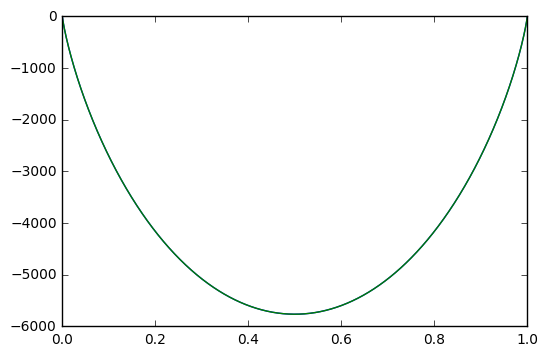

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(1e-9,1-1e-9,2000)
y = 1-x
gm = 8314.5*(np.log(x)*x + (y)*np.log(y))
ac = 0.8
mu = 8314.5*np.log(0.8)

trans_func = gm - mu*y*(x+y-1)
print(x[np.argmin(trans_func)])
plt.plot(x,gm, label='GM')
plt.plot(x, trans_func, label='L')

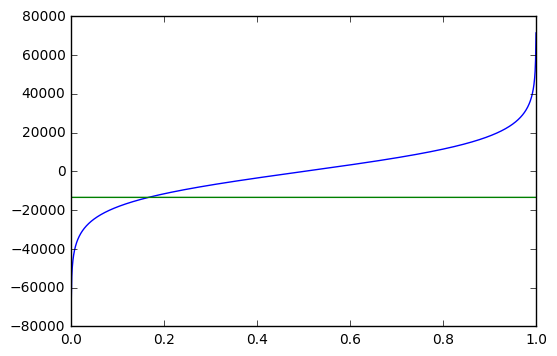

In [7]:
plt.plot(x,np.gradient(gm,x))
plt.plot(x,8314.5*np.log(x-x+0.2))